In [1]:
import sqlite3
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getDB(path, name):
    db = sqlite3.connect(os.path.join(path,name))
    return db

def getCursor(db):
    cursor = db.cursor()
    return cursor

In [3]:
path = "/scratch/users/mdelabrassinne/Database"
name = "SoccerDB.db"
db = getDB(path = path, name = name)
cursor = getCursor(db)

In [4]:
## NB of videos
def getNbVideos(cursor):
    cursor.execute("SELECT COUNT(duration) FROM VIDEO")
    tables = cursor.fetchall()
    for table in tables:
        print(table)
    return tables

getNbVideos(cursor)

(1100,)


[(1100,)]

In [21]:
## Analysis on the number and type of actions 
def getNbactions(cursor, action):
    query = 'SELECT COUNT(Label) FROM sequence WHERE label="{action}"'
    cursor.execute(query.format(action=action))
    nbactions = cursor.fetchall()
    for action in nbactions:
        rt = action[0]
        print(action[0])
    return rt

# Type of possible actions
cursor.execute("SELECT DISTINCT Label FROM sequence")
nbactions = cursor.fetchall()
print(nbactions)

# number of actions in the sequence table
goal = getNbactions(cursor, "Goal")
corner = getNbactions(cursor, "Corner")
kick_off = getNbactions(cursor, "Kick-off")
penalty = getNbactions(cursor, "Penalty")
Yellow_card = getNbactions(cursor, "Yellow card")
red_card = getNbactions(cursor, "Red card")
YR_card = getNbactions(cursor, "Yellow->red card")

cards = Yellow_card + red_card + YR_card

[('Kick-off',), ('Throw-in',), ('Corner',), ('Offside',), ('Clearance',), ('Goal',), ('Foul',), ('Substitution',), ('Penalty',), ('Ball out of play',), ('Indirect free-kick',), ('Shots off target',), ('Shots on target',), ('Yellow card',), ('Direct free-kick',), ('Yellow->red card',), ('Red card',)]
1690
4199
700
172
1114
34
24


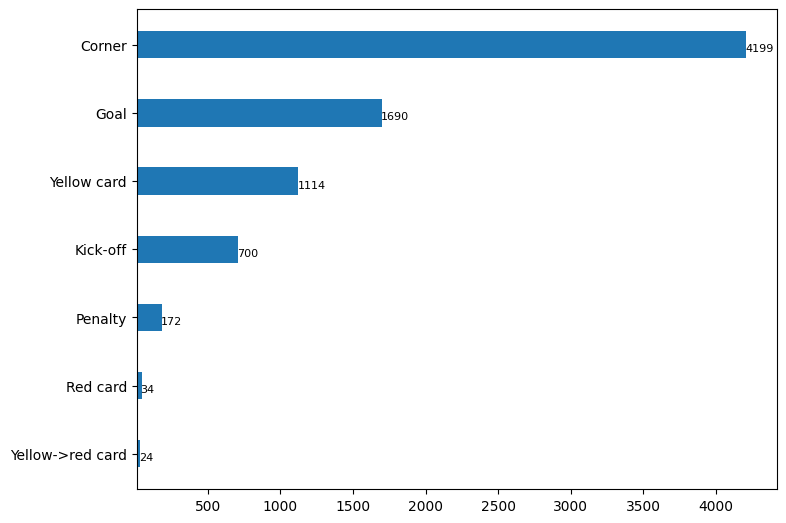

In [85]:
import matplotlib.pyplot as plt
figure = plt.figure()
ax = figure.add_axes([0,0,1,1])

actions = ['Corner','Goal',  'Yellow card', 'Kick-off', 'Penalty', 'Red card', 'Yellow->red card']
action__nb = [corner, goal, Yellow_card, kick_off, penalty, red_card, YR_card]
ax.barh(actions, action__nb, align='center', height = 0.4,  left=10, )
for i, v in enumerate(action__nb):
    ax.text(v + 3, i + .1, str(v), color='black', fontsize = 8)#, fontweight='bold')
ax.invert_yaxis()

plt.show()

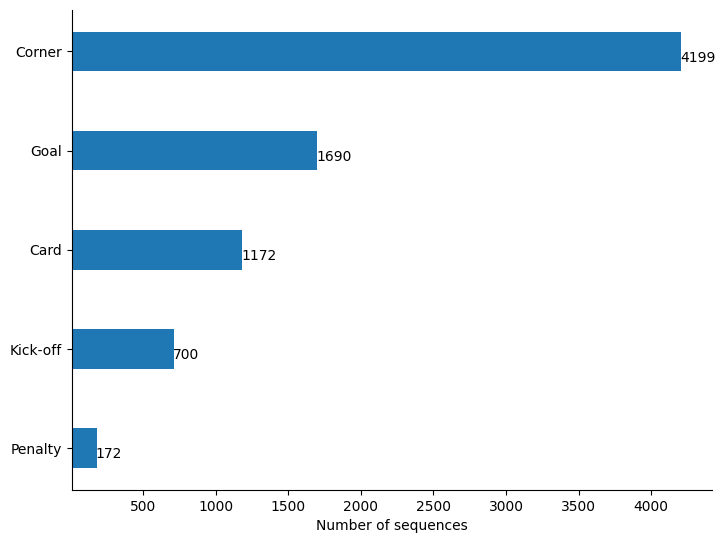

In [22]:
import matplotlib.pyplot as plt
figure = plt.figure()
ax = figure.add_axes([0,0,1,1])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

actions = ['Corner','Goal',  'Card', 'Kick-off', 'Penalty']
action__nb = [corner, goal, cards, kick_off, penalty]
ax.barh(actions, action__nb, align='center', height = 0.4,  left=10, )
for i, v in enumerate(action__nb):
    ax.text(v + 3, i + .1, str(v), color='black', fontsize = 10)#, fontweight='bold')
ax.invert_yaxis()
ax.set_xlabel("Number of sequences")

plt.show()

In [19]:
## Nomber of images per actions that we have

def getImageAction(cursor, action):
    query = """SELECT SUM(NumberOfImages) FROM sequence 
                WHERE label="{action}"
            """
    cursor.execute(query.format(action=action))
    nbactions = cursor.fetchall()
    for action in nbactions:
        rt = action[0]
        print(action[0])
    return rt

goal = getImageAction(cursor, "Goal")
corner = getImageAction(cursor, "Corner")
kick_off = getImageAction(cursor, "Kick-off")
penalty = getImageAction(cursor, "Penalty")
Yellow_card = getImageAction(cursor, "Yellow card")
red_card = getImageAction(cursor, "Red card")
YR_card = getImageAction(cursor, "Yellow->red card")

cards = Yellow_card + red_card + YR_card

42250
104975
17500
4300
27850
850
600


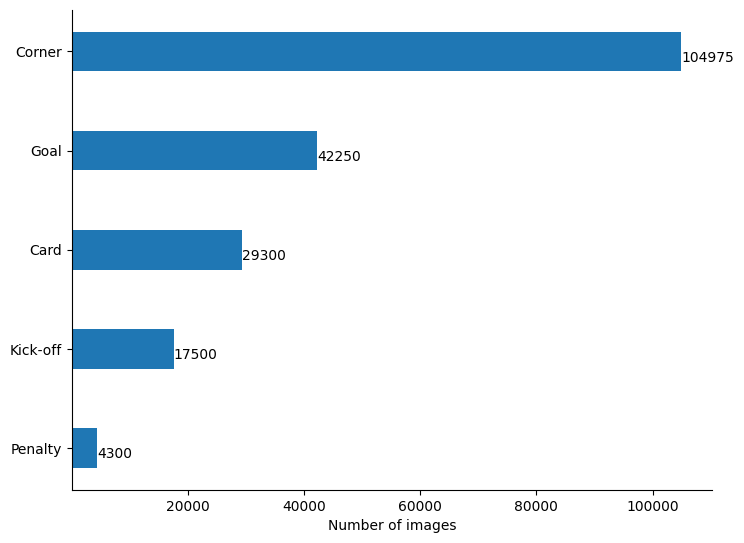

In [20]:
## PLOT nb of images for each type of action
import matplotlib.pyplot as plt
figure = plt.figure()
ax = figure.add_axes([0,0,1,1])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

actions = ['Corner','Goal',  'Card', 'Kick-off', 'Penalty']
action__nb = [corner, goal, cards, kick_off, penalty]
ax.barh(actions, action__nb, align='center', height = 0.4,  left=10, )
for i, v in enumerate(action__nb):
    ax.text(v + 3, i + .1, str(v), color='black', fontsize = 10)#, fontweight='bold')
ax.invert_yaxis()

ax.set_xlabel("Number of images")
plt.show()

In [4]:
## NUMBER of VIDEO with LABEL
query = "SELECT DISTINCT VideoPath FROM sequence"
cursor.execute(query)
nbactions = cursor.fetchall()
count = 0
nbHalh = 0
for action in nbactions:
    nbHalh += 1
    if "2_224p" in action[0]:
        count += 1
print(count)
print(nbHalh)

495
994


In [16]:
## Nombre de 'action' par mis temps
def actionPerHalfTime(cursor, action, nb):
    query = f"""
            SELECT COUNT(label) FROM sequence 
            WHERE label="{action}"
            GROUP BY VideoPath
            """
    cursor.execute(query)
    nbactions = cursor.fetchall()
    tab = np.zeros((nb))
    i = 0
    for action in nbactions:
        tab[i] = action[0]
        i += 1
    print(len(nbactions), sum(tab))
    return tab

nb = 994

goal = actionPerHalfTime(cursor, "Goal", nb)
corner = actionPerHalfTime(cursor, "Corner",nb)
kick_off = actionPerHalfTime(cursor, "Kick-off", nb)
penalty = actionPerHalfTime(cursor, "Penalty",nb)

## For all type of cards    
query = f"""
        SELECT COUNT(label) FROM sequence 
        WHERE label='Yellow card' OR label='Red card' or label='Yellow->red card'
        GROUP BY VideoPath
        """
cursor.execute(query)
nbactions = cursor.fetchall()
tab = np.zeros((nb))
i = 0
for action in nbactions:
    tab[i] = action[0]
    i += 1
print(len(nbactions), sum(tab))   
card = tab
    

797 1690.0
976 4199.0
536 700.0
159 172.0
460 1172.0


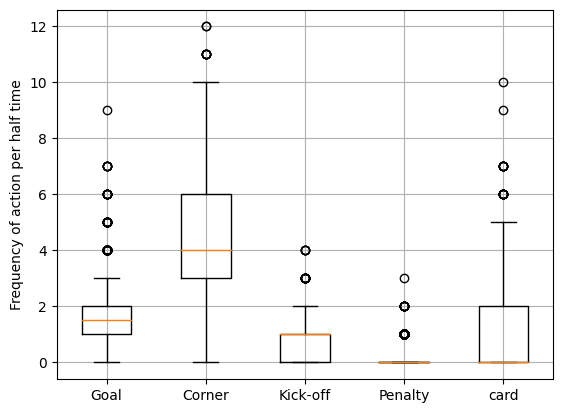

In [17]:
## PLOT
import matplotlib.pyplot as plt
figure = plt.figure()
ax = plt.axes()

actions = ['Goal','Corner', 'Kick-off','Penalty', 'card']
data = [goal, corner, kick_off, penalty, card]

ax.boxplot(data)
plt.xticks([1, 2, 3,4,5], actions)
ax.set_ylabel('Frequency of action per half time')

ax.grid()
plt.show()


In [14]:
query = "SELECT DISTINCT training_stage FROM video"
cursor.execute(query)
nbactions = cursor.fetchall()
for action in nbactions:
    print(action[0])

Training
Validation
Test


In [39]:
### Compared between test/validation/training set   AND training_stage ="Training"

def getNbactionsSETS(cursor, action):
    query = """
            SELECT COUNT(Label) FROM sequence 
            INNER JOIN video 
            WHERE sequence.label="{action}" AND video.training_stage = 'Training'"""
    cursor.execute(query.format(action=action))
    nbactions = cursor.fetchall()
    for action in nbactions:
        rt = action[0]
        print(action[0])
    return rt

# number of actions in the sequence table
goal = getNbactionsSETS(cursor, "Goal")

#corner = getNbactionsSETS(cursor, "Corner")
#kick_off = getNbactionsSETS(cursor, "Kick-off")
#penalty = getNbactionsSETS(cursor, "Penalty")
#Yellow_card = getNbactionsSETS(cursor, "Yellow card")
#red_card = getNbactionsSETS(cursor, "Red card")
#YR_card = getNbactionsSETS(cursor, "Yellow->red card")

#cards = Yellow_card + red_card + YR_card

1352000


In [71]:
### TIME line of the different actions
def getTimeAction(cursor, action):
    query = f"""
            SELECT StartTime FROM sequence 
            WHERE label="{action}"
            """
    cursor.execute(query.format(action=action))
    nbactions = cursor.fetchall()
    tab = np.zeros((len(nbactions)))
    i = 0
    for action in nbactions:
        tab[i] = action[0]
        i += 1
    return np.sort(tab/60)

def getTimeActionCard(cursor):
    query = f"""
        SELECT StartTime FROM sequence 
        WHERE label='Yellow card' OR label='Red card' or label='Yellow->red card'
        """
    cursor.execute(query)
    nbactions = cursor.fetchall()
    tab = np.zeros((len(nbactions)))
    i = 0
    for action in nbactions:
        tab[i] = action[0]
        i += 1  
    return np.sort(tab/60)

goal = getTimeAction(cursor, "Goal")
corner = getTimeAction(cursor, "Corner")
kick_off = getTimeAction(cursor, "Kick-off")
penalty = getTimeAction(cursor, "Penalty")
cards = getTimeActionCard(cursor)

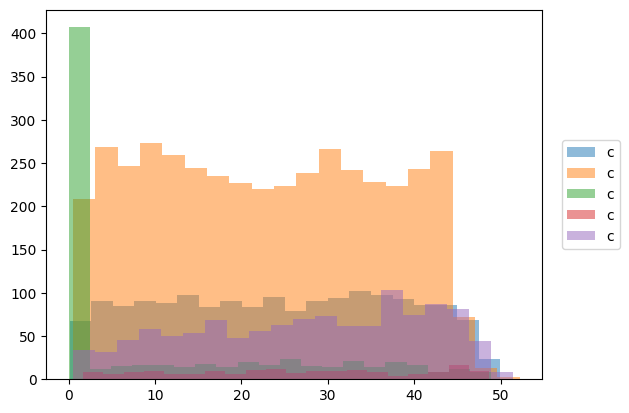

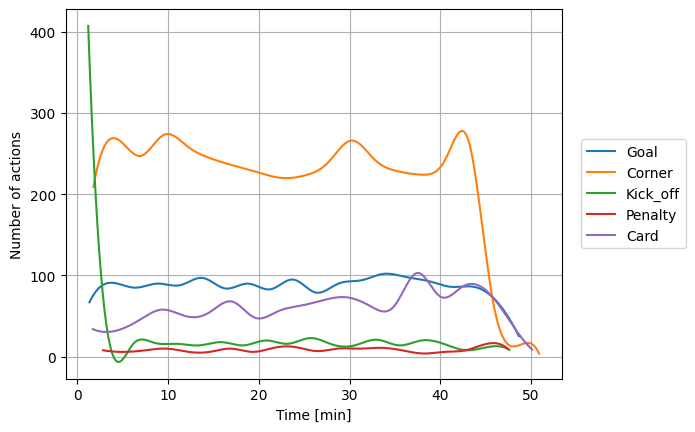

In [72]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

def get_interpolate(x, y):
    cs = CubicSpline(x, y)
    xs = np.arange(x.min(), x.max(), 0.1)
    cs = cs(xs)
    return xs, cs

actions = [goal, corner, kick_off, penalty, cards]
Lables = ['Goal', 'Corner', 'Kick_off', 'Penalty', 'Card']
n = []
x = []

figure = plt.figure()
ax = plt.axes()
b = 20
for action in actions:
    ni,xi,_ = ax.hist(action, alpha=0.5,bins = b, label='c')
    n.append(ni)
    x.append(xi)
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.show()


figure = plt.figure()
ax = plt.axes()

for i in range(len(actions)):
    xi = x[i]
    bin_centers = 0.5*(xi[1:]+xi[:-1])
    xs, cs = get_interpolate(bin_centers, n[i])
    ax.plot(xs,cs, label=Lables[i])
    
ax.set_xlabel("Time [min]")    
ax.set_ylabel("Number of actions")
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.grid()

plt.show()



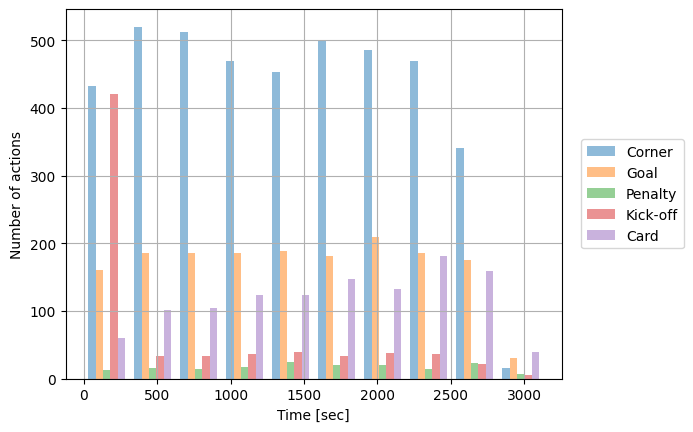

In [42]:
import matplotlib.pyplot as plt
figure = plt.figure()
ax = plt.axes()

b = 10

ax.hist([corner, goal, penalty, kick_off, cards], alpha=0.5,bins = b, label=['Corner', 'Goal', 'Penalty', 'Kick-off', 'Card'])
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Number of actions")

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.grid()
plt.show()


In [4]:
## NB frames per second
query = "SELECT DISTINCT fps FROM video"
cursor.execute(query)
nbactions = cursor.fetchall()
for action in nbactions:
    print(action[0])

25
